In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy = pd.read_sql_query('select * from lifeexpectancy',con=engine2)

engine2.dispose()


In [3]:
lifeexpectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [4]:
lifeexpectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
lifeexpectancy.isnull().sum()*100/len(lifeexpectancy)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [6]:
life_df=lifeexpectancy #make a copy
life_df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
life_df.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"Hepatitis_B",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [8]:
country_list = life_df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','Hepatitis_B','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population',
             'thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [9]:
#use interpolate since it's a time series 
for country in country_list:
    life_df.loc[life_df['Country'] == country,fill_list] = life_df.loc[life_df['Country'] == country,fill_list].interpolate()
    
# Drop Nans after interpolat
life_df.dropna(inplace=True)


In [10]:
life_df.isnull().sum() # after interpolation

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
Hepatitis_B                 0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

In [11]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'Hepatitis_B', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

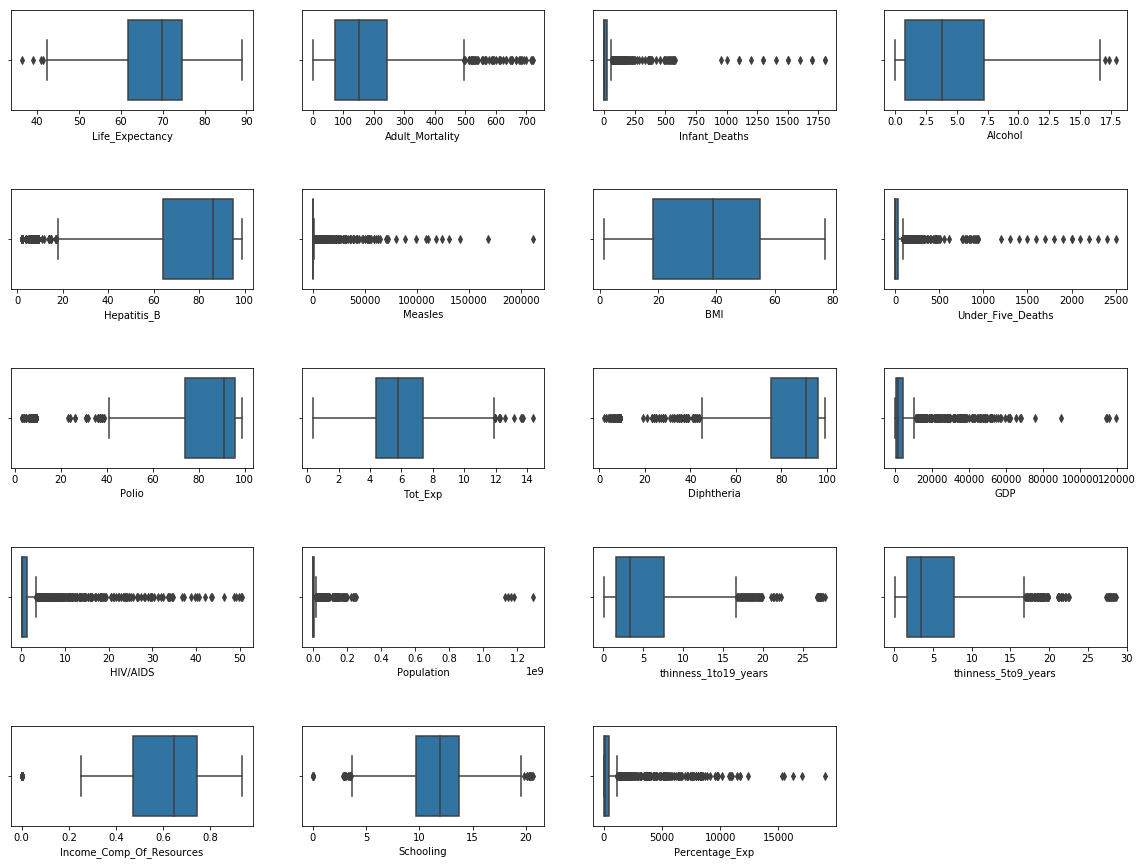

In [12]:
#let's visualize data 
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.8)

plt.subplot(5,4,1)
sns.boxplot(x=life_df["Life_Expectancy"])

plt.subplot(5,4,2)
sns.boxplot(x=life_df["Adult_Mortality"])

plt.subplot(5,4,3)
sns.boxplot(x=life_df["Infant_Deaths"])

plt.subplot(5,4,4)
sns.boxplot(x=life_df["Alcohol"])

plt.subplot(5,4,5)
sns.boxplot(x=life_df["Hepatitis_B"])
                     
plt.subplot(5,4,6)
sns.boxplot(x=life_df["Measles"])

plt.subplot(5,4,7)
sns.boxplot(x=life_df["BMI"])

plt.subplot(5,4,8)
sns.boxplot(x=life_df["Under_Five_Deaths"])

plt.subplot(5,4,9)
sns.boxplot(x=life_df["Polio"])

plt.subplot(5,4,10)
sns.boxplot(x=life_df["Tot_Exp"])

plt.subplot(5,4,11)
sns.boxplot(x=life_df["Diphtheria"])

plt.subplot(5,4,12)
sns.boxplot(x=life_df["GDP"])

plt.subplot(5,4,13)
sns.boxplot(x=life_df["HIV/AIDS"])

plt.subplot(5,4,14)
sns.boxplot(x=life_df["Population"])

plt.subplot(5,4,15)
sns.boxplot(x=life_df["thinness_1to19_years"])

#plt.subplot(5,4,17)
#sns.boxplot(x=life_df["thinness  1-19 years"])
#plt.show()
plt.subplot(5,4,16)
sns.boxplot(x=life_df["thinness_5to9_years"])

plt.subplot(5,4,17)
sns.boxplot(x=life_df["Income_Comp_Of_Resources"])

plt.subplot(5,4,18)
sns.boxplot(x=life_df["Schooling"])

plt.subplot(5,4,19)
sns.boxplot(x=life_df["Percentage_Exp"])
plt.show()

In [13]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'Hepatitis_B':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,
            'HIV/AIDS':13,'GDP':14,'Population':15, 'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

In [37]:
for i in col_dict.keys():
    q75, q25 = np.percentile(life_df[i], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(i,
                                                                             len((np.where((life_df[i] > max_val) | 
                                                                                           (life_df[i] < min_val))[0])),len((np.where((life_df[i] > max_val) | 
                                                                                           (life_df[i] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis_B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perc

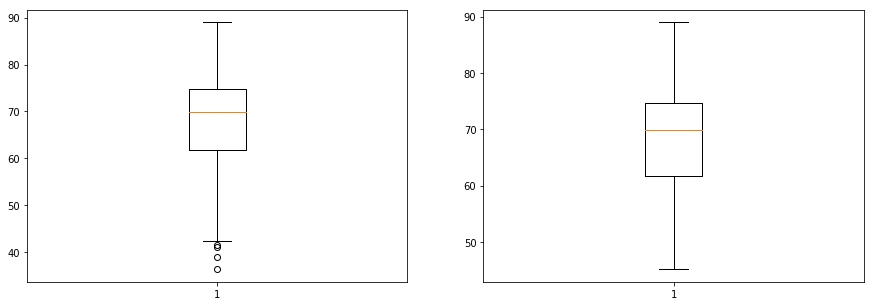

In [38]:
from scipy.stats.mstats import winsorize

w_lifeex=winsorize(life_df["Life_Expectancy"], (0.01, 0))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df["Life_Expectancy"])

plt.subplot (1,2,2)
plt.boxplot(w_lifeex)
plt.show()

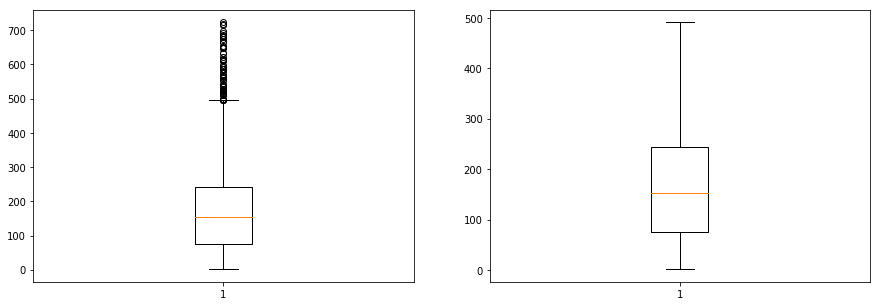

In [46]:
w_adult_mortality=winsorize(life_df["Adult_Mortality"], (0, 0.03))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df["Adult_Mortality"])

plt.subplot (1,2,2)
plt.boxplot(w_adult_mortality)
plt.show()

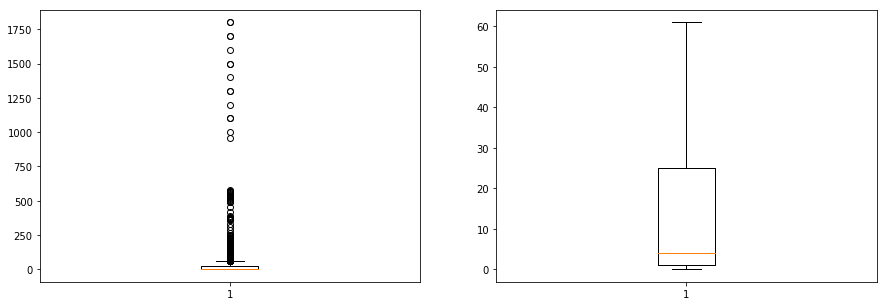

In [17]:
w_infant_deaths=winsorize(life_df["Infant_Deaths"], (0, 0.10))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df["Infant_Deaths"])

plt.subplot (1,2,2)
plt.boxplot(w_infant_deaths)
plt.show()

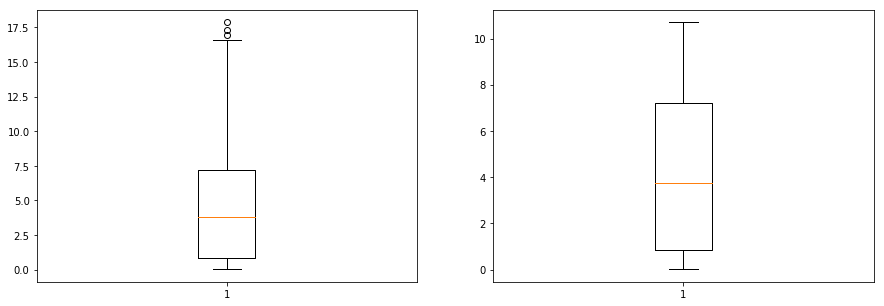

In [18]:
w_Alcohol=winsorize(life_df['Alcohol'],(0, 0.1))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df["Alcohol"])

plt.subplot (1,2,2)
plt.boxplot(w_Alcohol)
plt.show()

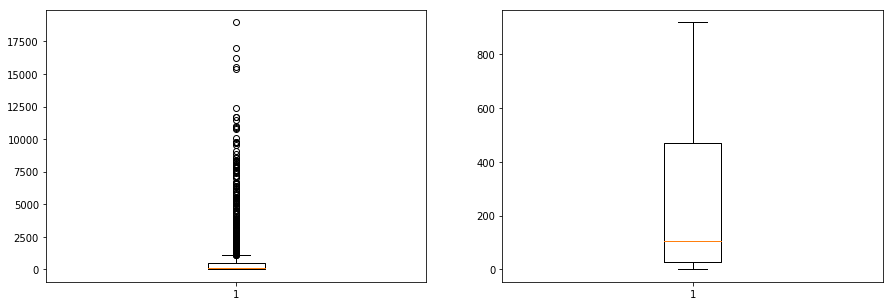

In [19]:
w_percent_exp= winsorize(life_df['Percentage_Exp'],(0, 0.14))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df["Percentage_Exp"])

plt.subplot (1,2,2)
plt.boxplot(w_percent_exp)
plt.show()

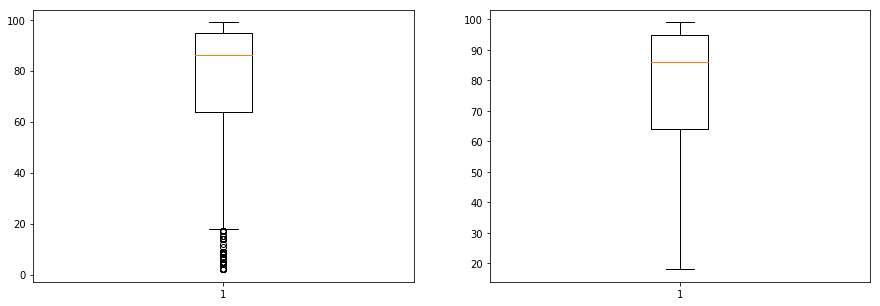

In [20]:
w_Hepatitis_B=winsorize(life_df['Hepatitis_B'],(0.11, 0))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Hepatitis_B'])

plt.subplot (1,2,2)
plt.boxplot(w_Hepatitis_B)
plt.show()

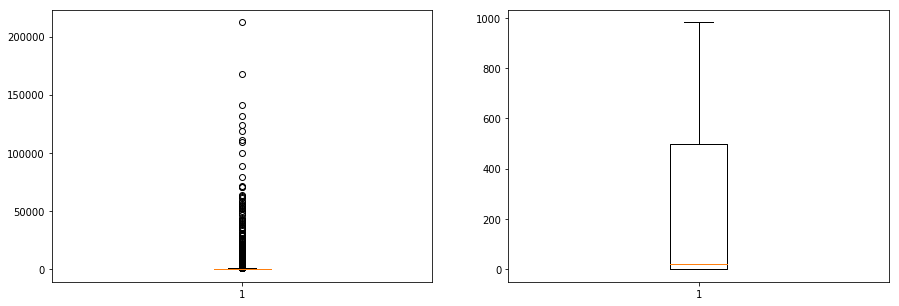

In [21]:
w_Measles=winsorize(life_df['Measles'],(0, 0.20))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Measles'])

plt.subplot (1,2,2)
plt.boxplot(w_Measles)
plt.show()

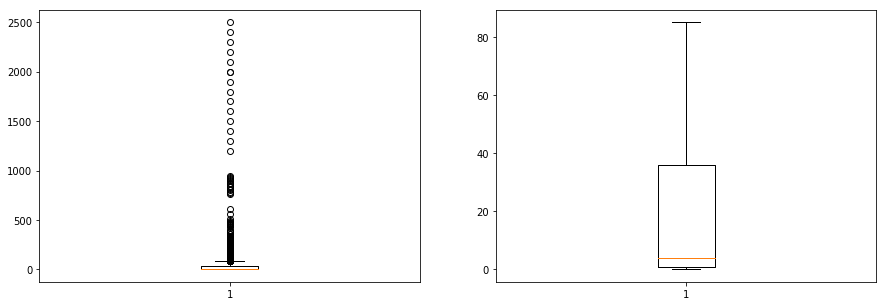

In [22]:
w_under_five_deaths=winsorize(life_df['Under_Five_Deaths'],(0, 0.12))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Under_Five_Deaths'])

plt.subplot (1,2,2)
plt.boxplot(w_under_five_deaths)
plt.show()

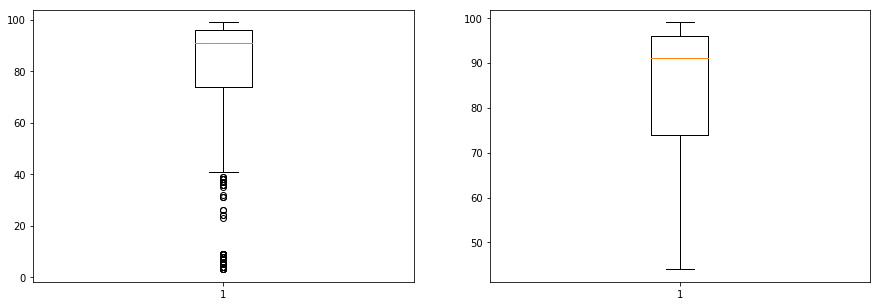

In [23]:
w_Polio=winsorize(life_df['Polio'],(0.09, 0))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Polio'])

plt.subplot (1,2,2)
plt.boxplot(w_Polio)
plt.show()

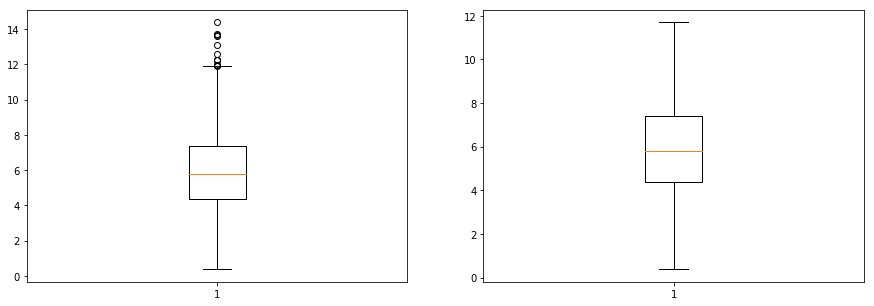

In [24]:
w_total_exp=winsorize(life_df['Tot_Exp'],(0, 0.01))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Tot_Exp'])

plt.subplot (1,2,2)
plt.boxplot(w_total_exp)
plt.show()

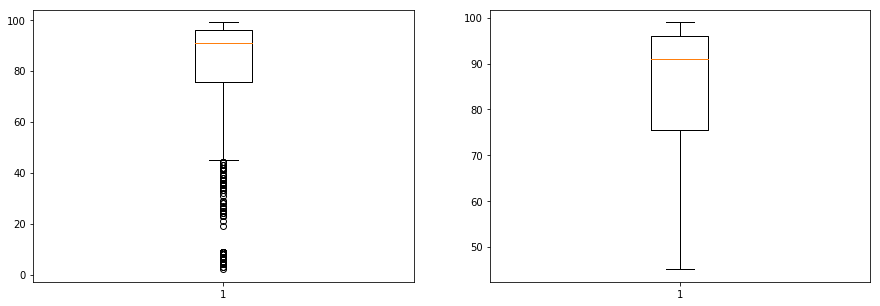

In [25]:
w_Diphtheria=winsorize(life_df['Diphtheria'],(0.10, 0))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Diphtheria'])

plt.subplot (1,2,2)
plt.boxplot(w_Diphtheria)
plt.show()

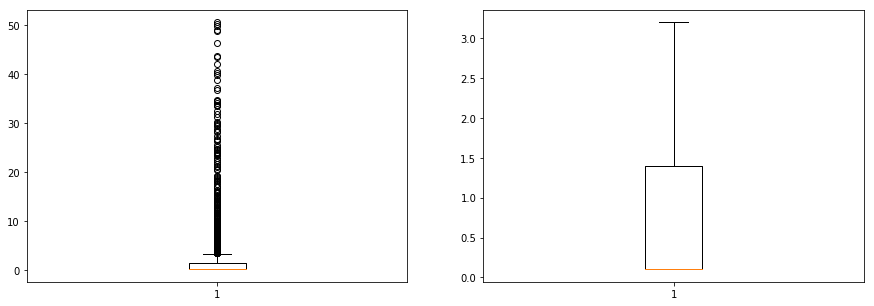

In [26]:
w_HIV=winsorize(life_df['HIV/AIDS'],(0, 0.16))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['HIV/AIDS'])

plt.subplot (1,2,2)
plt.boxplot(w_HIV)
plt.show()

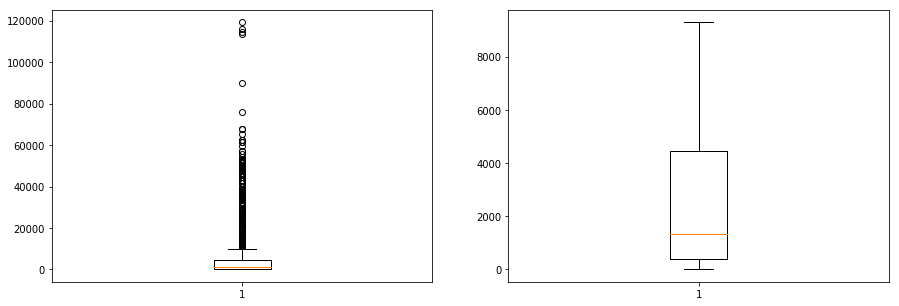

In [27]:
w_GDP= winsorize(life_df['GDP'], (0, 0.13))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['GDP'])

plt.subplot (1,2,2)
plt.boxplot(w_GDP)
plt.show()

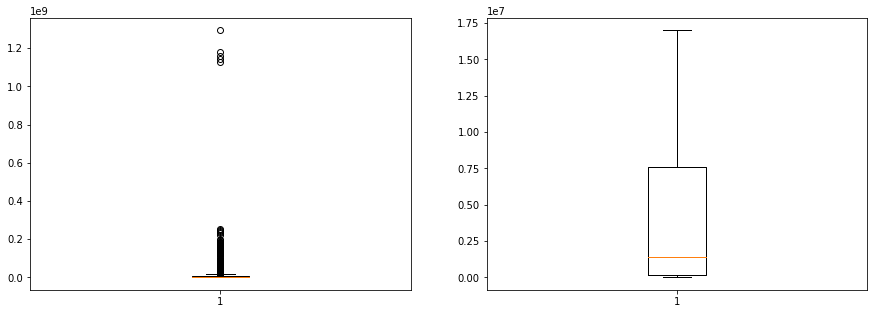

In [28]:
w_Population=winsorize(life_df['Population'],(0, 0.14))
w2_Population=winsorize(w_Population,(0, 0.14))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Population'])

plt.subplot (1,2,2)
plt.boxplot(w2_Population)
plt.show()

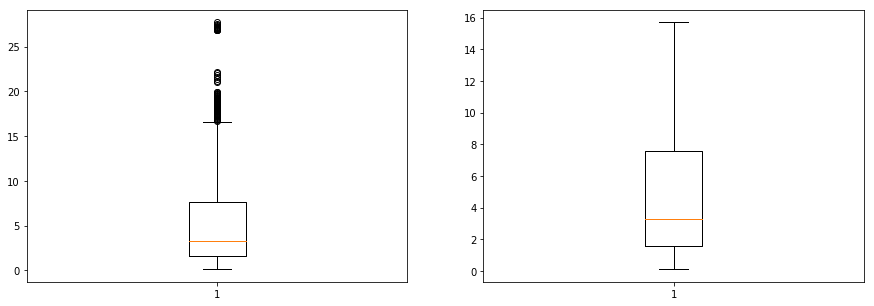

In [29]:
w_thinness_1_19_years=winsorize(life_df['thinness_1to19_years'],(0, 0.04))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['thinness_1to19_years'])

plt.subplot (1,2,2)
plt.boxplot(w_thinness_1_19_years)
plt.show()
    
        


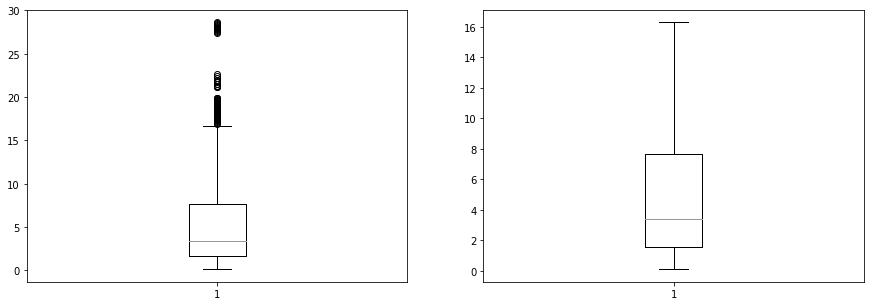

In [30]:
w_thinness_5_9=winsorize(life_df['thinness_5to9_years'],(0, 0.04))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['thinness_5to9_years'])

plt.subplot (1,2,2)
plt.boxplot(w_thinness_5_9)
plt.show()

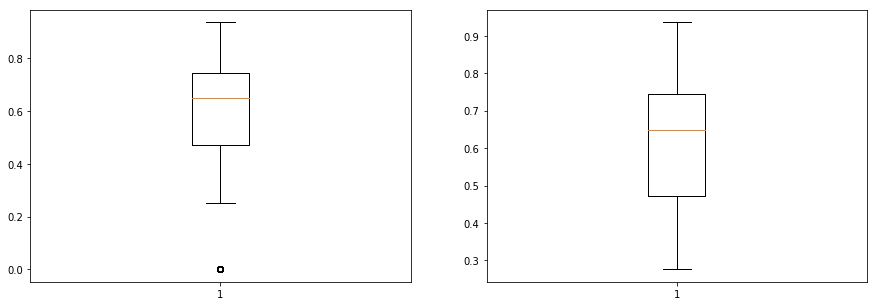

In [31]:
w_Income=winsorize(life_df['Income_Comp_Of_Resources'],(0.05, 0))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Income_Comp_Of_Resources'])

plt.subplot (1,2,2)
plt.boxplot(w_Income)
plt.show()

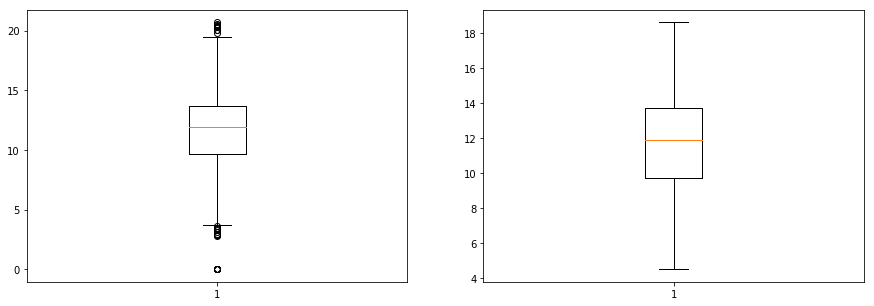

In [32]:
w_Schooling=winsorize(life_df['Schooling'],(0.02, 0.01))
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
plt.boxplot(life_df['Schooling'])

plt.subplot (1,2,2)
plt.boxplot(w_Schooling)
plt.show()

In [42]:
win_col= [w_lifeex, w_adult_mortality, w_infant_deaths, w_Alcohol,
    w_percent_exp, w_Hepatitis_B, w_Measles,
       w_under_five_deaths, w_Polio, w_total_exp, w_Diphtheria,
       w_HIV, w_GDP, w_Population, w_thinness_1_19_years,
       w_thinness_5_9, w_Income, w_Schooling]

In [52]:
for var in win_col:
    q75, q25 = np.percentile(var, [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after winsorization : {}".format(len(np.where((var > max_val) | (var < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [54]:
life_df['w_lifeex']= w_lifeex
life_df['w_adult_mortality']=w_adult_mortality
life_df['w_infant deaths']=w_infant_deaths
life_df['w_Alcohol']=w_Alcohol
life_df['w_percent_exp']= w_percent_exp
life_df['w_Hepatitis_B']=w_Hepatitis_B
life_df['w_Measles']=w_Measles
life_df['w_under_five_deaths']=w_under_five_deaths
life_df['w_Polio']=w_Polio
life_df['w_total_exp']=w_total_exp
life_df['w_Diphtheria']=w_Diphtheria
life_df['w_HIV/AIDS']=w_HIV
life_df['w_GDP']=w_GDP
life_df['w_Population']=w_Population
life_df['w_thinness_1_19_years']=w_thinness_1_19_years
life_df['w_thinness_5_9']=w_thinness_5_9
life_df['w_Income']=w_Income
life_df['w_Schooling']=w_Schooling


In [61]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'Hepatitis_B', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling',
       'w_lifeex', 'w_adult_mortality', 'w_infant deaths', 'w_Alcohol',
       'w_percent_exp', 'w_Hepatitis_B', 'w_Measles', 'w_under_five_deaths',
       'w_Polio', 'w_total_exp', 'w_Diphtheria', 'w_HIV/AIDS', 'w_GDP',
       'w_Population', 'w_thinness_1_19_years', 'w_thinness_5_9', 'w_Income',
       'w_Schooling'],
      dtype='object')

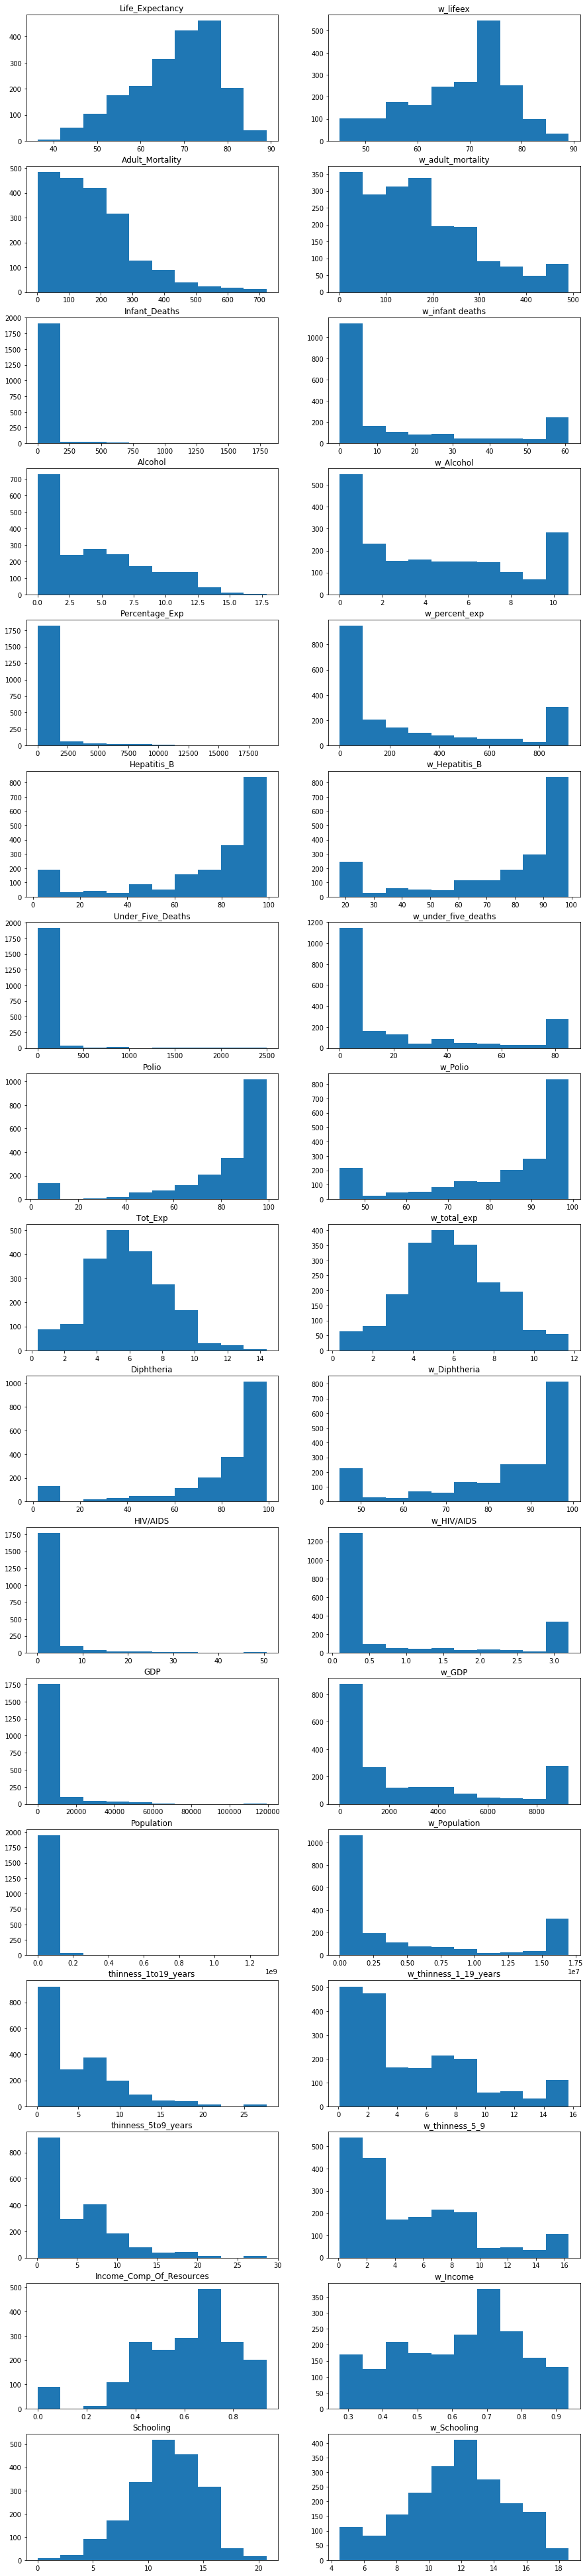

In [64]:
all_col = ['Life_Expectancy','w_lifeex','Adult_Mortality','w_adult_mortality','Infant_Deaths',
         'w_infant deaths','Alcohol','w_Alcohol','Percentage_Exp','w_percent_exp','Hepatitis_B',
         'w_Hepatitis_B','Under_Five_Deaths','w_under_five_deaths','Polio','w_Polio','Tot_Exp',
         'w_total_exp','Diphtheria','w_Diphtheria','HIV/AIDS','w_HIV/AIDS','GDP','w_GDP',
         'Population','w_Population','thinness_1to19_years','w_thinness_1_19_years','thinness_5to9_years',
         'w_thinness_5_9','Income_Comp_Of_Resources','w_Income',
         'Schooling','w_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(life_df[all_col[i]])
    plt.title(all_col[i])

plt.show()


In [373]:
#just practicing here
#def fill_zeros(i):
#   if i<=10:
#       return i * 10
#   else:
#      return i 

In [375]:
#life_df['Diphtheria'] = life_df['Diphtheria'].apply(fill_zeros)

In [271]:
w_Population=winsorize(life_df['Population'],(0, 0.14))

In [275]:
w2_Population=winsorize(w_Population,(0, 0))

In [67]:
life_df_win = life_df.iloc[:,21:]
life_df_win['Country'] = life_df['Country']
life_df_win['Year'] = life_df['Year']
life_df_win['Status'] = life_df['Status']
life_df_win_num = life_df_win.iloc[:,:-3]
cormat = life_df_win_num.corr()
#looking at correlations

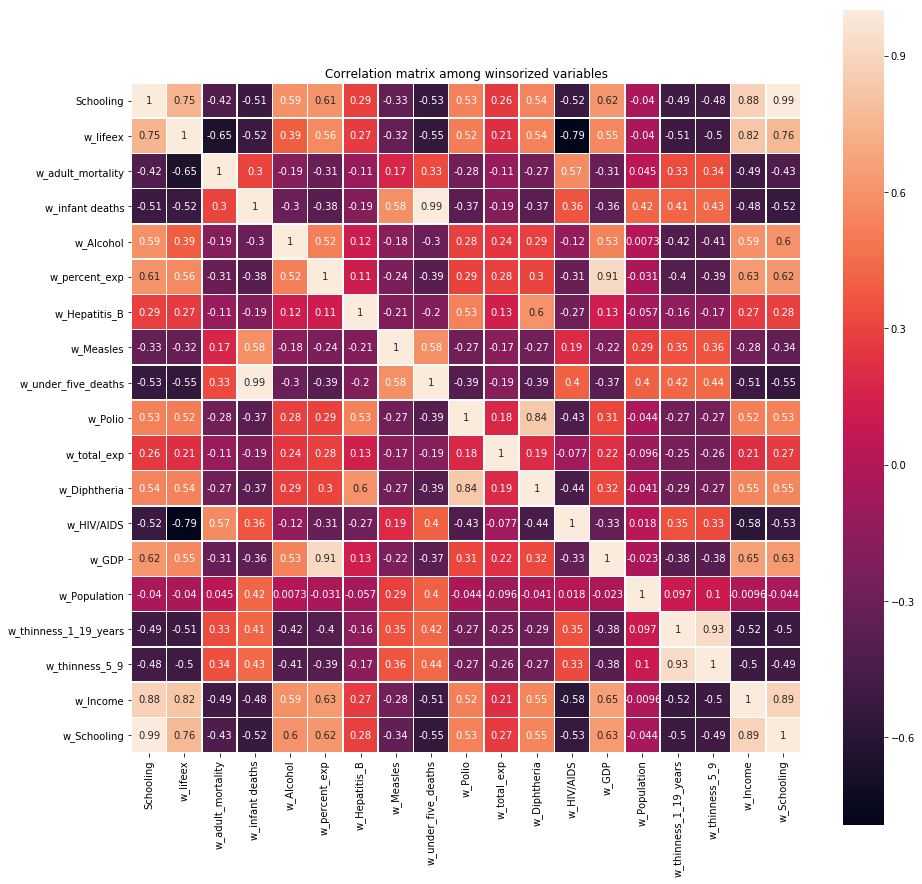

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [ ]:
#under five deaths is highly correlated with w_infant_death
#life expectancy also has high correlation with schooling, followed by income
#GDP and percent expenditure is highly correlated

In [69]:
round(life_df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [70]:
#let's see how significant it is

In [74]:
import scipy.stats as stats
stats.ttest_ind(life_df.loc[life_df['Status']=='Developed','Life_Expectancy'],life_df.loc[life_df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [ ]:
#our p -value is significant. 
# for feature selection I would choose feature columns that are correlated with Life_Expectancy in the heatmap uch as 
#w_Schooling, w_Income, w_HIV, #w_Adult_Mortality. We can also use status due it's significance

#After feature selections, we can then apply a boxcox transformation. 

